In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data_Mouse_metadata.csv"
study_results_path = "data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

data_final = pd.merge(mouse_metadata,study_results,how="left", on=["Mouse ID", "Mouse ID"])

data_final.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
data_final['Mouse ID'].value_counts().head()

g989    13
s710    10
u327    10
y865    10
p136    10
Name: Mouse ID, dtype: int64

In [29]:
data_mice = data_final.set_index('Mouse ID')
#Delete the data for repeating mice
clean_data_mice = data_mice.drop(index = 'g989')
clean_study_data = clean_data_mice.reset_index()
clean_study_data['Mouse ID'].value_counts().head()


m546    10
y769    10
i901    10
b879    10
c757    10
Name: Mouse ID, dtype: int64

In [46]:
drug_and_time_tumor_mean = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_and_time_tumor_mean = drug_and_time_tumor_mean.reset_index()
drug_and_time_tumor_mean

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [47]:
drug_and_time_tumor_sem = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
drug_and_time_tumor_sem = drug_and_time_tumor_sem.reset_index()
drug_and_time_tumor_sem.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [55]:
drug_and_time_tumor_median = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_and_time_tumor_median = drug_and_time_tumor_median.reset_index()
drug_and_time_tumor_median.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [66]:
drug_and_time_tumor_var = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_and_time_tumor_var = drug_and_time_tumor_var.reset_index()
drug_and_time_tumor_var.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [67]:
drug_and_time_tumor_std = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_and_time_tumor_std = drug_and_time_tumor_std.reset_index()
drug_and_time_tumor_std.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708


In [93]:
drug_and_time_tumor_mean = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_and_time_tumor_var = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_and_time_tumor_std = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_and_time_tumor_median = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_and_time_tumor_sem = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": drug_and_time_tumor_mean, "Median": drug_and_time_tumor_median, "Variance": drug_and_time_tumor_var, "Standard Deviation": drug_and_time_tumor_std, 
                          "SEM": drug_and_time_tumor_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


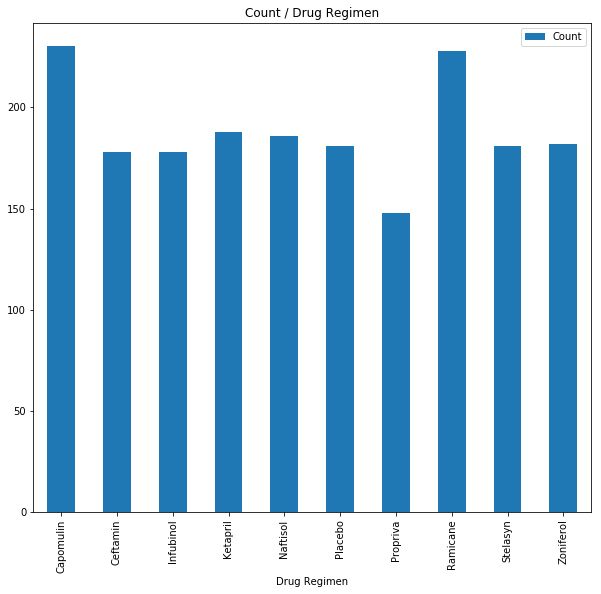

In [65]:
grouped_data_drug = pd.DataFrame(clean_study_data.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
bar_plot_data = grouped_data_drug[["Drug Regimen","Mouse ID"]]
bar_plot_data = bar_plot_data.rename(columns={"Mouse ID": "Count"})
bar_plot_data = bar_plot_data.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot_data.plot(kind="bar", figsize=(10,9))
plt.title("Count / Drug Regimen")
plt.show()


<BarContainer object of 10 artists>

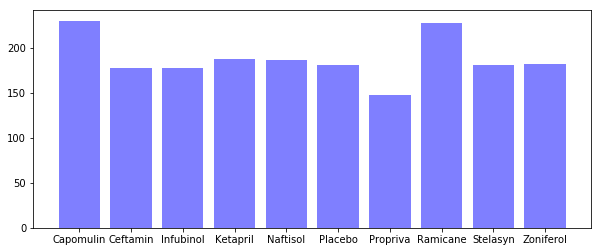

In [97]:
drug_regimens = summary_df.index.tolist()
drug_regimens

regimen_count = (clean_study_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count


x_axis = np.arange(len(regimen_count))


# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

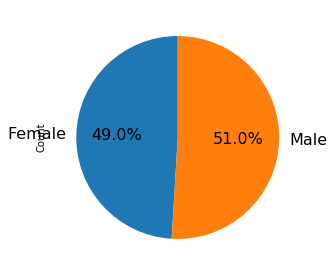

In [69]:
gender_df = pd.DataFrame(clean_study_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()

gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

([<matplotlib.patches.Wedge at 0x2486971f208>,
 [Text(0.033082,1.0995,'Females'), Text(-0.033082,-1.0995,'Males')],
 [Text(0.0180447,0.599729,'49.0%'), Text(-0.0180447,-0.599729,'51.0%')])

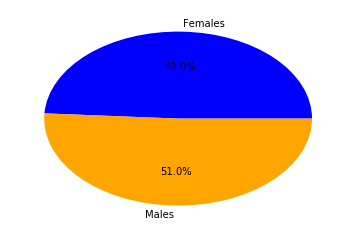

In [79]:
gender_count = (clean_study_data.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Females", "Males"]
colors = [ "blue","orange"]
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%")


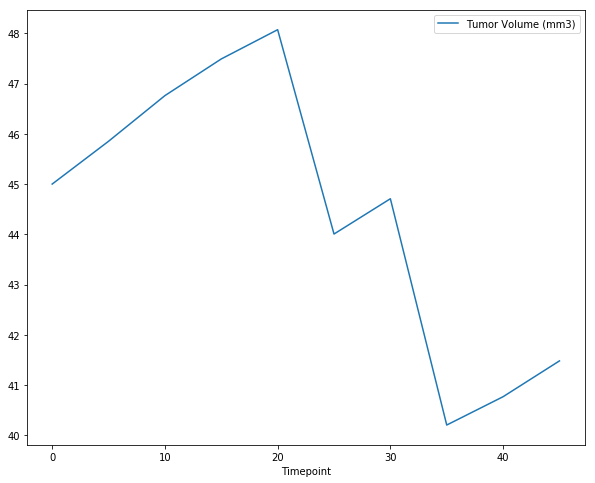

In [85]:
capomulin_df = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8))


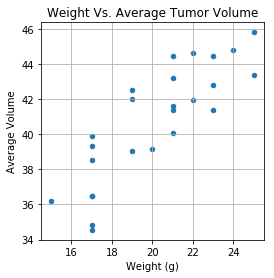

In [99]:
reduced = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
average_cap = pd.DataFrame(reduced.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap = average_cap.set_index('Mouse ID')
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")

The correlation between both factors is 0.84


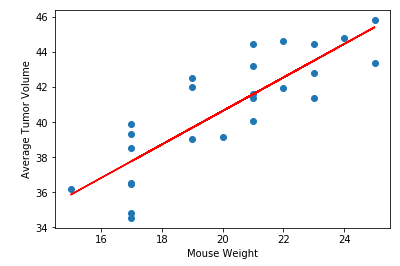

In [100]:
from scipy.stats import linregress
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
corr = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [104]:
sorted_df = clean_study_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]

cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]

quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)



inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]


quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

import plotly.graph_objects as go
import plotly.offline as pyo


trace0 = go.Box(
        y = cap_list,
        name = "Capomulin"
)
trace1 = go.Box(
        y = ram_list,
        name = "Ramicane"
)
trace2 = go.Box(
        y = inf_list,
        name = "Infubinol"
)
trace3 = go.Box(
        y = cef_list,
        name = "Ceftamin"
)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title = "Final tumor volume for the four most promising treatment regimens")
fig = go.Figure(data=data, layout=layout)

pyo.plot(fig)


'temp-plot.html'